In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Leitura da base de dados
seg_auto = pd.read_table("Reg_Log_NaoRenovacao_SeguroAuto.txt")
seg_auto

,Nao_Renovou,Renda,Reclamacoes,Educacao,Tempo_cliente,Classe_idade,Idade_carro,Debito_autom
0,1,03_>R$ 5000,04_>5,04_Pos-graduacao,01_Ate 1 ano,03_36 a 55,02_1 a 3 anos,01_Nao
1,1,03_>R$ 5000,04_>5,04_Pos-graduacao,01_Ate 1 ano,03_36 a 55,02_1 a 3 anos,01_Nao
2,1,03_>R$ 5000,03_3 a 5,04_Pos-graduacao,01_Ate 1 ano,02_26 a 35,01_Zero,01_Nao
3,1,03_>R$ 5000,03_3 a 5,04_Pos-graduacao,01_Ate 1 ano,04_>55,02_1 a 3 anos,01_Nao
4,1,02_Entre R$ 2001 e R$ 5000,04_>5,03_Curso superior,02_1 a 3 anos,03_36 a 55,04_7 a 9 anos,01_Nao
...,...,...,...,...,...,...,...,...
2138,0,02_Entre R$ 2001 e R$ 5000,03_3 a 5,02_Ensino Medio,02_1 a 3 anos,03_36 a 55,05_>=10 anos,02_Sim
2139,0,02_Entre R$ 2001 e R$ 5000,04_>5,01_Ensino Fundamental,03_>3 anos,03_36 a 55,03_4 a 6 anos,02_Sim
2140,0,01_Ate R$ 2000,01_Nenhuma,02_Ensino Medio,02_1 a 3 anos,03_36 a 55,01_Zero,01_Nao
2141,0,03_>R$ 5000,04_>5,01_Ensino Fundamental,03_>3 anos,02_26 a 35,02_1 a 3 anos,01_Nao


In [3]:
seg_auto.shape

(2143, 8)

In [4]:
seg_auto.dtypes

Nao_Renovou       int64
Renda            object
Reclamacoes      object
Educacao         object
Tempo_cliente    object
Classe_idade     object
Idade_carro      object
Debito_autom     object
dtype: object

In [5]:
seg_auto.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Nao_Renovou,2143.0,0.458236,0.498369,0.0,0.0,0.0,1.0,1.0


In [6]:
# Contagem relativa das variáveis qualitativas
seg_auto.Renda.value_counts(normalize=True) * 100

01_Ate R$ 2000                42.417172
02_Entre R$ 2001 e R$ 5000    34.857676
03_>R$ 5000                   22.725152
Name: Renda, dtype: float64

In [7]:
seg_auto.Renda.value_counts() #Frequência Absoluna

01_Ate R$ 2000                909
02_Entre R$ 2001 e R$ 5000    747
03_>R$ 5000                   487
Name: Renda, dtype: int64

In [8]:
seg_auto.Reclamacoes.value_counts(normalize=True) * 100

03_3 a 5      34.437704
02_Ate 3      27.718152
01_Nenhuma    23.098460
04_>5         14.745684
Name: Reclamacoes, dtype: float64

In [45]:
seg_auto.Educacao.value_counts(normalize=True).sort_index() * 100

01_Ensino Fundamental    18.898740
02_Ensino Medio          35.277648
03_Curso superior        25.618292
04_Pos-graduacao         20.205320
Name: Educacao, dtype: float64

In [10]:
seg_auto.Tempo_cliente.value_counts(normalize=True) * 100

03_>3 anos       36.117592
01_Ate 1 ano     35.324312
02_1 a 3 anos    28.558096
Name: Tempo_cliente, dtype: float64

## Fazer a tabela de frequencias para as demais variáveis qualitativas

In [11]:
seg_auto.Classe_idade.value_counts(normalize=True) * 100

03_36 a 55    42.883808
02_26 a 35    35.277648
04_>55        12.179188
01_Ate 25      9.659356
Name: Classe_idade, dtype: float64

In [12]:
seg_auto.Idade_carro.value_counts(normalize=True) * 100

01_Zero          25.944937
02_1 a 3 anos    19.785348
03_4 a 6 anos    19.785348
04_7 a 9 anos    19.412039
05_>=10 anos     15.072329
Name: Idade_carro, dtype: float64

In [13]:
seg_auto.Debito_autom.value_counts(normalize=True) * 100

01_Nao    74.381708
02_Sim    25.618292
Name: Debito_autom, dtype: float64

## Tabelas cruzadas com a variável resposta

In [17]:
Renda_tab = pd.crosstab(seg_auto["Renda"],seg_auto["Nao_Renovou"], normalize='index')
Renda_tab

Nao_Renovou,0,1
Renda,,
01_Ate R$ 2000,0.851485,0.148515
02_Entre R$ 2001 e R$ 5000,0.337349,0.662651
03_>R$ 5000,0.277207,0.722793


In [18]:
Reclamacoes_tab = pd.crosstab(seg_auto["Reclamacoes"],seg_auto["Nao_Renovou"],normalize='index')
Reclamacoes_tab

Nao_Renovou,0,1
Reclamacoes,,
01_Nenhuma,0.890909,0.109091
02_Ate 3,0.757576,0.242424
03_3 a 5,0.268293,0.731707
04_>5,0.227848,0.772152


In [19]:
Educacao_tab = pd.crosstab(seg_auto["Educacao"],seg_auto["Nao_Renovou"],normalize='index')
Educacao_tab

Nao_Renovou,0,1
Educacao,,
01_Ensino Fundamental,0.755556,0.244444
02_Ensino Medio,0.797619,0.202381
03_Curso superior,0.327869,0.672131
04_Pos-graduacao,0.166282,0.833718


## Fazer análise bidimensional:  Covariável x Resposta para as demais covariáveis

In [20]:
Tempo_cliente_tab = pd.crosstab(seg_auto["Tempo_cliente"],seg_auto["Nao_Renovou"],normalize='index')
Tempo_cliente_tab

Nao_Renovou,0,1
Tempo_cliente,,
01_Ate 1 ano,0.166446,0.833554
02_1 a 3 anos,0.529412,0.470588
03_>3 anos,0.918605,0.081395


A maioria dos clientes ainda não renovaram, pois não chegou no período de renovação

In [21]:
Tempo_cliente_tab = pd.crosstab(seg_auto["Tempo_cliente"],seg_auto["Nao_Renovou"],normalize='index')
Tempo_cliente_tab

Nao_Renovou,0,1
Tempo_cliente,,
01_Ate 1 ano,0.166446,0.833554
02_1 a 3 anos,0.529412,0.470588
03_>3 anos,0.918605,0.081395


In [22]:
Classe_idade_tab = pd.crosstab(seg_auto["Classe_idade"],seg_auto["Nao_Renovou"],normalize='index')
Classe_idade_tab

Nao_Renovou,0,1
Classe_idade,,
01_Ate 25,0.608696,0.391304
02_26 a 35,0.785714,0.214286
03_36 a 55,0.421110,0.578890
04_>55,0.206897,0.793103


In [23]:
Idade_carro_tab = pd.crosstab(seg_auto["Idade_carro"],seg_auto["Nao_Renovou"],normalize='index')
Idade_carro_tab

Nao_Renovou,0,1
Idade_carro,,
01_Zero,0.341727,0.658273
02_1 a 3 anos,0.497642,0.502358
03_4 a 6 anos,0.601415,0.398585
04_7 a 9 anos,0.665865,0.334135
05_>=10 anos,0.705882,0.294118


In [24]:
Debito_autom_tab = pd.crosstab(seg_auto["Debito_autom"],seg_auto["Nao_Renovou"],normalize='index')
Debito_autom_tab

Nao_Renovou,0,1
Debito_autom,,
01_Nao,0.472396,0.527604
02_Sim,0.743169,0.256831


## Análise da relação entra as covariáveis - Estatística de Cramers'v 

In [25]:
from scipy.stats import chi2_contingency
import numpy as np

In [58]:
crosstab = np.array(pd.crosstab(seg_auto["Renda"],seg_auto["Reclamacoes"])) # Construção da tabela cruzada
crosstab

array([[351, 306, 126, 126],
       [ 81, 207, 351, 108],
       [ 63,  81, 261,  82]], dtype=int64)

In [59]:
stat = chi2_contingency(crosstab)[0] # Valor da estatística Qui-quadrado
stat
#Valores altos, Qui-quadrado representam que as variáveis tem algum tipo de dependencia

398.04138817443106

In [60]:
n = np.sum(crosstab) # Numero de observações da tabela cruzada
n

2143

In [61]:
mini = min(crosstab.shape)-1 # Função "min" pega o valor mínimo entre linha e coluna da tabela cruzada
mini

2

In [62]:
CramerV =  np.sqrt(stat/(n*mini))
CramerV

0.3047460132064015

### Calcular a estatística V de Cramer para Renda e Educacao

In [63]:
crosstab = np.array(pd.crosstab(seg_auto["Renda"],seg_auto["Educacao"])) # Construção da tabela cruzada
crosstab

array([[216, 459, 144,  90],
       [ 99, 225, 378,  45],
       [ 90,  72,  27, 298]], dtype=int64)

In [64]:
stat = chi2_contingency(crosstab)[0] # Valor da estatística Qui-quadrado
stat
#Valores altos, Qui-quadrado representam que as variáveis tem algum tipo de dependencia

966.8280342433225

In [65]:
n = np.sum(crosstab) # Numero de observações da tabela cruzada
n

2143

In [66]:
mini = min(crosstab.shape)-1 # Função "min" pega o valor mínimo entre linha e coluna da tabela cruzada
mini

2

In [67]:
CramerV =  np.sqrt(stat/(n*mini))
CramerV

0.47495070212126106

# Modelo de Regressão Logística

In [68]:
import statsmodels.api as sm

In [69]:
model = sm.GLM.from_formula("Nao_Renovou ~ Renda + Reclamacoes + Educacao + Tempo_cliente + Classe_idade + Idade_carro + Debito_autom", 
                            family = sm.families.Binomial(), data=seg_auto)

In [33]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Nao_Renovou   No. Observations:                 2143
Model:                            GLM   Df Residuals:                     2124
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -313.42
Date:                Wed, 20 Jan 2021   Deviance:                       626.85
Time:                        20:46:57   Pearson chi2:                     838.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2330      0.934     -6.672      0.000      -8.064      -4.402
Renda[T.02_Entre R$ 2001 e R$ 5000]     2.8393      0.333      8.520      0.000       2.186       3.493
Renda[T.03_>R$ 5000]                    2.8682      0.427      6.709      0.000       2.030       3.706
Reclamacoes[T.02_Ate 3]                 3.3185      0.548      6.051      0.000       2.244       4.393
Reclamacoes[T.03_3 a 5]                 7.8430      0.679     11.546      0.000       6.512       9.174
Reclamacoes[T.04_>5]                    8.2638      0.780     10.591      0.000       6.734       9.793
Educacao[T.02_Ensino Medio]            -0.7381      0.406     -1.818      0.069      -1.534       0.058
Educacao[T.03_Curso superior]           3.0278      0.494      6.132      0.000       2.060       3.996
Educacao[T.04_Pos-graduacao]            3.1661      0.513      6.166      0.000       2.160       4.172
Tempo_cliente[T.02_1 a 3 anos]         -2.4161      0.341     -7.091      0.000      -3.084      -1.748
Tempo_cliente[T.03_>3 anos]            -5.5590      0.413    -13.459      0.000      -6.369      -4.749
Classe_idade[T.02_26 a 35]             -1.1821      0.725     -1.630      0.103      -2.603       0.239
Classe_idade[T.03_36 a 55]              1.8034      0.663      2.719      0.007       0.503       3.103
Classe_idade[T.04_>55]                  2.9121      0.641      4.540      0.000       1.655       4.169
Idade_carro[T.02_1 a 3 anos]           -0.1822      0.303     -0.601      0.548      -0.776       0.412
Idade_carro[T.03_4 a 6 anos]           -0.9793      0.306     -3.196      0.001      -1.580      -0.379
Idade_carro[T.04_7 a 9 anos]           -1.2720      0.308     -4.134      0.000      -1.875      -0.669
Idade_carro[T.05_>=10 anos]            -1.6919      0.348     -4.858      0.000      -2.375      -1.009
Debito_autom[T.02_Sim]                 -1.4137      0.251     -5.623      0.000      -1.906      -0.921
=======================================================================================================
"""

O que devemos olhar:

Se adotar 5% a variavel Idade_Carro sairia

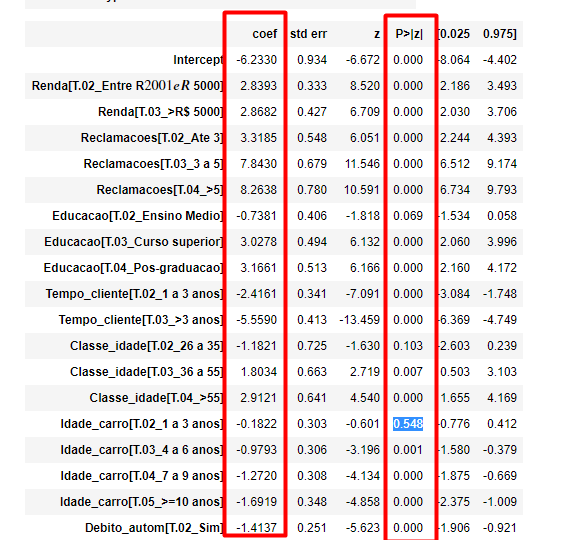

In [70]:
# Salvando a probabilidade predita
seg_auto['prob'] = result.fittedvalues

In [78]:
seg_auto.head(5)

,Nao_Renovou,Renda,Reclamacoes,Educacao,Tempo_cliente,Classe_idade,Idade_carro,Debito_autom,prob,propenso
0,1,03_>R$ 5000,04_>5,04_Pos-graduacao,01_Ate 1 ano,03_36 a 55,02_1 a 3 anos,01_Nao,0.999938,1
1,1,03_>R$ 5000,04_>5,04_Pos-graduacao,01_Ate 1 ano,03_36 a 55,02_1 a 3 anos,01_Nao,0.999938,1
2,1,03_>R$ 5000,03_3 a 5,04_Pos-graduacao,01_Ate 1 ano,02_26 a 35,01_Zero,01_Nao,0.998441,1
3,1,03_>R$ 5000,03_3 a 5,04_Pos-graduacao,01_Ate 1 ano,04_>55,02_1 a 3 anos,01_Nao,0.999969,1
4,1,02_Entre R$ 2001 e R$ 5000,04_>5,03_Curso superior,02_1 a 3 anos,03_36 a 55,04_7 a 9 anos,01_Nao,0.997560,1


In [71]:
# Marcando os propensos - Usa ponto de corte da média da base
seg_auto['propenso'] = np.where(seg_auto['prob'] >= seg_auto['Nao_Renovou'].mean(), 1, 0)

In [72]:
tabela_desempenho = pd.crosstab(seg_auto['Nao_Renovou'], seg_auto['propenso'])
tabela_desempenho

propenso,0,1
Nao_Renovou,,
0,1081,80
1,52,930


In [73]:
acuracia = (tabela_desempenho[0][0] + tabela_desempenho[1][1])/tabela_desempenho.sum().sum()
acuracia

0.9384041063929072

In [74]:
# Entendendo a função .sum()
tabela_desempenho.sum()

propenso
0    1133
1    1010
dtype: int64

In [75]:
# Entendendo a função .sum().sum()
tabela_desempenho.sum().sum()

2143

In [76]:
sensibilidade = (tabela_desempenho[1][1])/(tabela_desempenho[1][1] + tabela_desempenho[0][1])
sensibilidade

0.9470468431771895

In [77]:
especificidade = (tabela_desempenho[0][0])/(tabela_desempenho[0][0] + tabela_desempenho[1][0])
especificidade

0.9310938845822567

## Área abaixo da curva ROC

In [42]:
import numpy as np
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(seg_auto['Nao_Renovou'], seg_auto['prob'])

0.986926169763758

#### Realizar o processo de redução até que todos o parâmetros fiquem significantes ao nível 5% e avaliar o ajuste do modelo

In [122]:
model = sm.GLM.from_formula("Nao_Renovou ~ Renda + Reclamacoes + Tempo_cliente  + Debito_autom", 
                            family = sm.families.Binomial(), data=seg_auto)

In [123]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Nao_Renovou   No. Observations:                 2143
Model:                            GLM   Df Residuals:                     2134
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -515.81
Date:                Wed, 20 Jan 2021   Deviance:                       1031.6
Time:                        22:11:06   Pearson chi2:                 1.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -2.0555      0.279     -7.380      0.000      -2.601      -1.510
Renda[T.02_Entre R$ 2001 e R$ 5000]     2.9007      0.230     12.607      0.000       2.450       3.352
Renda[T.03_>R$ 5000]                    2.3114      0.243      9.516      0.000       1.835       2.787
Reclamacoes[T.02_Ate 3]                 1.3071      0.266      4.916      0.000       0.786       1.828
Reclamacoes[T.03_3 a 5]                 4.0565      0.294     13.819      0.000       3.481       4.632
Reclamacoes[T.04_>5]                    4.8162      0.338     14.270      0.000       4.155       5.478
Tempo_cliente[T.02_1 a 3 anos]         -2.4490      0.216    -11.327      0.000      -2.873      -2.025
Tempo_cliente[T.03_>3 anos]            -5.1432      0.270    -19.035      0.000      -5.673      -4.614
Debito_autom[T.02_Sim]                 -1.5727      0.191     -8.247      0.000      -1.947      -1.199
=======================================================================================================
"""

In [130]:
# Salvando a probabilidade predita
seg_auto['prob'] = result.fittedvalues

In [131]:
# Marcando os propensos - Usa ponto de corte da média da base
seg_auto['propenso'] = np.where(seg_auto['prob'] >= seg_auto['Nao_Renovou'].mean(), 1, 0)

In [136]:
# Copiar as celulas depois do ajuste do modelo completo
tabela_desempenho = pd.crosstab(seg_auto['Nao_Renovou'], seg_auto['propenso'])
tabela_desempenho

propenso,0,1
Nao_Renovou,,
0,1009,152
1,126,856


In [137]:
acuracia = (tabela_desempenho[0][0] + tabela_desempenho[1][1])/tabela_desempenho.sum().sum()
acuracia

0.8702753149790013

In [138]:
sensibilidade = (tabela_desempenho[1][1])/(tabela_desempenho[1][1] + tabela_desempenho[0][1])
sensibilidade

0.8716904276985743

In [139]:
especificidade = (tabela_desempenho[0][0])/(tabela_desempenho[0][0] + tabela_desempenho[1][0])
especificidade

0.8690783807062877

In [140]:
roc_auc_score(seg_auto['Nao_Renovou'], seg_auto['prob'])

0.9615810690622418

Avaliar estatistica de Cramer-V